## Module 7

In [1]:
from textblob import TextBlob

In [2]:
my_string = "John found a new coach and a new bed in his new apartment."

In [3]:
opt = TextBlob(my_string)

In [4]:
opt.tags

[('John', 'NNP'),
 ('found', 'VBD'),
 ('a', 'DT'),
 ('new', 'JJ'),
 ('coach', 'NN'),
 ('and', 'CC'),
 ('a', 'DT'),
 ('new', 'JJ'),
 ('bed', 'NN'),
 ('in', 'IN'),
 ('his', 'PRP$'),
 ('new', 'JJ'),
 ('apartment', 'NN')]

In [5]:
import nltk
# reg_exp = "NP:{<DT>?<JJ>*<NN>}"
reg_exp = "NP:{<DT>{1,3}<JJ>{1,3}<NN>{1,3}}"

rp = nltk.chunk.RegexpParser(reg_exp)

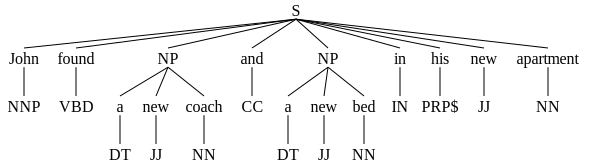

In [6]:
output = rp.parse(opt.tags)
output

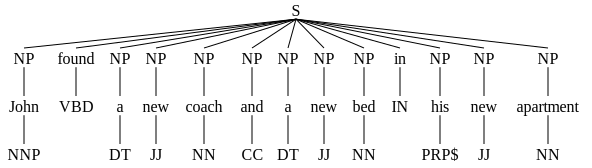

In [7]:
# reg_exp = "NP:{<DT>?<JJ>*<NN>}"
reg_exp = r""" NP: 
{<.*>} # chunking 
}<VBD|IN>+{ # chinking
"""
rp = nltk.chunk.RegexpParser(reg_exp)

output = rp.parse(opt.tags)
output

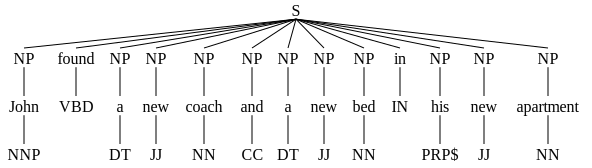

In [8]:
# reg_exp = "NP:{<DT>?<JJ>*<NN>}"
reg_exp = r""" NP: 
{<.*>} # chunking 
}<VBD|IN>+{ # chinking
"""
rp = nltk.chunk.RegexpParser(reg_exp)

output = rp.parse(opt.tags)

output

In [9]:
output.draw()

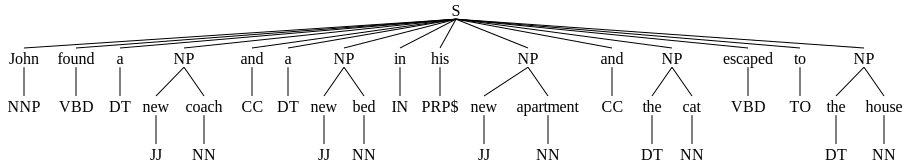

In [10]:
my_string = "John found a new coach and a new bed in his new apartment and the cat escaped to the house"
opt = TextBlob(my_string)
reg_exp = r""" NP: 
{(<JJ>{1,2}<NN>{1,2})|(<DT>{1,2}<NN>{1,2})} # chunking 
}<VBD|IN>+{ # chinking
"""
rp = nltk.chunk.RegexpParser(reg_exp)
output = rp.parse(opt.tags)
output

## Module 8

In [11]:
from sklearn.datasets import fetch_20newsgroups
news = fetch_20newsgroups(subset="all")

<BarContainer object of 20 artists>

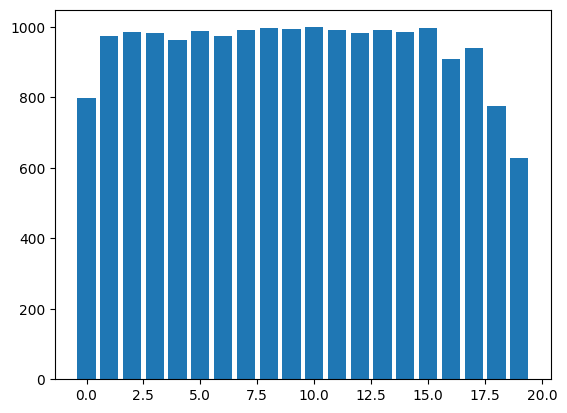

In [12]:
import pandas as pd 

data = {
    "news" : list(news.data),
    "target" : list(news.target)
}

df = pd.DataFrame(data)

count_df = df["target"].value_counts().reset_index()

import matplotlib.pyplot as plt
plt.bar(x=count_df["target"],height=count_df["count"])

In [13]:
import string
import xgboost as xgb
from sklearn import svm
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer


In [14]:
# load the stop words 
from nltk.corpus import stopwords
stopwords_ = stopwords.words("english")

In [15]:
def print_model_names(pipe):
    for name, model in pipe.named_steps.items():
        print(f"{name}: {type(model).__name__}")

def train_test_split_trainer(classifier, X, y, extra_info : str = None): 

    # train, test data 
    X_train, X_test, y_train, y_test = train_test_split(X,y , random_state=104,test_size=0.25, shuffle=True)

    # train 
    classifier.fit(X_train,y_train)

    if extra_info:
        print(extra_info)

    # print the model name 
    print_model_names(classifier)
    
    # print the accuracies 
    print(f"Train Accuracy : {classifier.score(X_train,y_train)}")
    print(f"Test Accuracy : {classifier.score(X_test,y_test)}")

    print('-'*30,"\n")


In [16]:
# pipeline 1 
pipe1= Pipeline([("vectorizer", TfidfVectorizer()),("classifier", MultinomialNB())])
pipe2= Pipeline([("vectorizer", TfidfVectorizer(stop_words=stopwords_)),("classifier", MultinomialNB())])
pipe3= Pipeline([("vectorizer", TfidfVectorizer(stop_words=stopwords_)),("classifier", MultinomialNB(alpha=0.05))])
pipe4= Pipeline([("vectorizer", TfidfVectorizer(stop_words=(stopwords_ + list(string.punctuation)),min_df=5)),("classifier", svm.LinearSVC())])

pipe5 = Pipeline([
    ("vectorizer", TfidfVectorizer(stop_words=(stopwords_ + list(string.punctuation)), min_df=5)),
    ("classifier", RandomForestClassifier(n_estimators=100, random_state=42))
])

pipe6 = Pipeline([
    ("vectorizer", TfidfVectorizer(stop_words=(stopwords_ + list(string.punctuation)), min_df=5)),
    ("classifier", xgb.XGBClassifier())
])

train_test_split_trainer(pipe1,X=news.data, y=news.target)
train_test_split_trainer(pipe2,X=news.data, y=news.target,extra_info="TF-IDF with Stop words")
train_test_split_trainer(pipe3,X=news.data, y=news.target,extra_info="TF-IDF with Stop words + Alpha")
train_test_split_trainer(pipe4,X=news.data, y=news.target,extra_info="TF-IDF with Stop words+Min_df+SVM")
train_test_split_trainer(pipe5,X=news.data, y=news.target,extra_info="TF-IDF with Stop words+Min_df+Random Forest(n_estimators=100, random_state=42)")
train_test_split_trainer(pipe6,X=news.data, y=news.target,extra_info="TF-IDF with Stop words+Min_df+Xgboost()")






vectorizer: TfidfVectorizer
classifier: MultinomialNB
Train Accuracy : 0.9234470072166407
Test Accuracy : 0.841044142614601
------------------------------ 

TF-IDF with Stop words
vectorizer: TfidfVectorizer
classifier: MultinomialNB
Train Accuracy : 0.9447431724918636
Test Accuracy : 0.8679966044142614
------------------------------ 

TF-IDF with Stop words + Alpha
vectorizer: TfidfVectorizer
classifier: MultinomialNB
Train Accuracy : 0.9905193151266449
Test Accuracy : 0.9129881154499151
------------------------------ 

TF-IDF with Stop words+Min_df+SVM
vectorizer: TfidfVectorizer
classifier: LinearSVC
Train Accuracy : 0.9989387293052214
Test Accuracy : 0.9276315789473685
------------------------------ 

TF-IDF with Stop words+Min_df+Random Forest(n_estimators=100, random_state=42)
vectorizer: TfidfVectorizer
classifier: RandomForestClassifier
Train Accuracy : 1.0
Test Accuracy : 0.8435908319185059
------------------------------ 

TF-IDF with Stop words+Min_df+Xgboost()
vectorizer: Tf

| Configuration                                             | Vectorizer        | Classifier                | Train Accuracy         | Test Accuracy          | Overfitted           |
|-----------------------------------------------------------|-------------------|---------------------------|------------------------|------------------------|----------------------|
| Basic TF-IDF                                              | TfidfVectorizer   | MultinomialNB             | 0.9234470072166407     | 0.841044142614601      | No                   |
| TF-IDF with Stop words                                    | TfidfVectorizer   | MultinomialNB             | 0.9447431724918636     | 0.8679966044142614     | No                   |
| TF-IDF with Stop words + Alpha                            | TfidfVectorizer   | MultinomialNB             | 0.9905193151266449     | 0.9129881154499151     | No                   |
| TF-IDF with Stop words + Min_df + SVM                     | TfidfVectorizer   | LinearSVC                 | 0.9989387293052214     | 0.9276315789473685     | Slightly             |
| TF-IDF with Stop words + Min_df + Random Forest (n=100)   | TfidfVectorizer   | RandomForestClassifier    | 1.0                    | 0.8435908319185059     | Yes                  |
| TF-IDF with Stop words + Min_df + XGBoost                 | TfidfVectorizer   | XGBClassifier             | 0.9998584972406962     | 0.8516553480475382     | Yes                  |
